In [182]:
# pip install ipypb

In [2]:
import pandas as pd
import numpy as np
# ÏßÑÌñâÏÉÅÌô©ÏùÑ ÌôïÏù∏
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
final = pd.read_csv('C:/Users/zxoro/OneDrive/Î∞îÌÉï ÌôîÎ©¥/ÎçîÏä§Ìè¨Ï∏†Ïª§ÎÆ§ÎãàÏºÄÏù¥ÏÖò ÏûêÎ£å/data/final.csv')

# RFM Î∂ÑÏÑùÏóê ÌïÑÏöîÌïú Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Ï†ïÎ¶¨ 
final = final.sort_values(by='game_date')
final = final.reset_index()
final['game_date'] = pd.to_datetime(final['game_date'])
final.drop(['ticket_no', 'product_denomination_name','audience', 'index','game_time','match_info','product_grade_name','seat_Attribute_4','rank','sale','reserve_diff','MB_AGE','job','favorite_idx'], axis = 1, inplace = True)

In [3]:
df_rfm = final.copy()
df_rfm

membership_no  game_date  new_price
0             102806 2022-02-19      19000
1             138215 2022-02-19      13000
2             138215 2022-02-19      19500
3             125933 2022-02-19      12000
4             143862 2022-02-19      57000
...              ...        ...        ...
25147         136617 2022-10-16      10500
25148         136617 2022-10-16      63000
25149         136617 2022-10-16      42000
25150         149857 2022-10-16      42000
25151         151984 2022-10-16      14000

[25152 rows x 3 columns]

In [4]:
# RECENCY
# RecencyÏóêÏÑú Ï†úÏùº ÏµúÍ∑ºÏóêÏÑú Í∞íÏùÑ Î∫å
# Ï†êÏàòÎ•º Î∂ÄÏó¨Ìï† Í≤ΩÏö∞ 5,4,3,2,1ÏúºÎ°ú Î∂ÄÏó¨Ìï®
recency = pd.DataFrame(df_rfm.groupby('membership_no')['game_date'].max().reset_index())
recency['game_date'] = pd.to_datetime(recency['game_date'])
recency['MaxDate'] = recency['game_date'].max()
recency['recency'] = (recency['MaxDate'] - recency['game_date']).dt.days + 1
recency = recency[['membership_no','recency']]
recency.head()

membership_no  recency
0            137      141
1            153        1
2            180        1
3            208        1
4            291        1

In [5]:
# Frequecy
frequency = pd.DataFrame(df_rfm.groupby('membership_no')['game_date'].count().reset_index())
frequency.columns = ['fCustomerID','frequency']
frequency.head()

fCustomerID  frequency
0          137          1
1          153         11
2          180          2
3          208         22
4          291         29

In [6]:
# MONETARY
monetary = pd.DataFrame(df_rfm.groupby('membership_no')['new_price'].sum().reset_index())
monetary.columns = ['mCustomerID','monetary']
monetary.head()

mCustomerID  monetary
0          137    100000
1          153    164000
2          180     61000
3          208    281000
4          291    609000

In [7]:
# combining the three into one table
rfm = pd.concat([recency,frequency,monetary], axis=1)
rfm.drop(['fCustomerID','mCustomerID'], axis=1, inplace=True)
rfm

membership_no  recency  frequency  monetary
0               137      141          1    100000
1               153        1         11    164000
2               180        1          2     61000
3               208        1         22    281000
4               291        1         29    609000
...             ...      ...        ...       ...
7422         151972        1          1     40000
7423         151978        1          1     14000
7424         151980        1          1     14000
7425         151981        1          1     30000
7426         151984        1          1     14000

[7427 rows x 4 columns]

In [8]:
# extracting SPEED OF VISIT

customer_list = list(df_rfm.membership_no.unique())
c = []
v = []
for ids in customer_list:
    sov = df_rfm[df_rfm['membership_no']==ids].groupby('game_date')['new_price'].count().reset_index()
    if sov.shape[0]>3:
        sov['game_date1'] = sov['game_date'].shift(1)
        sov['Difference'] = (sov['game_date']-sov['game_date1']).dt.days
        mean_days = round(sov.Difference.mean(),0)
        c.append(ids)
        v.append(mean_days)
    else:
        c.append(ids)
        v.append(0)
speed_of_visit = pd.DataFrame()
speed_of_visit['sCustomerID'] = c
speed_of_visit['sov'] = v
speed_of_visit = speed_of_visit.sort_values('sCustomerID').reset_index(drop=True)
speed_of_visit.head()

sCustomerID   sov
0          137   0.0
1          153  24.0
2          180   0.0
3          208  14.0
4          291  16.0

In [9]:
# checking the summary
rfm.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

membership_no      recency    frequency      monetary
count    7427.000000  7427.000000  7427.000000  7.427000e+03
mean   134908.826444    78.712805     3.386563  9.560307e+04
std     21358.751306    80.830038     4.413840  1.258049e+05
min       137.000000     1.000000     1.000000  6.000000e+03
25%    125997.000000     6.000000     1.000000  2.600000e+04
50%    143545.000000    51.000000     2.000000  5.200000e+04
75%    148347.000000   153.000000     4.000000  1.050000e+05
90%    150560.600000   218.000000     8.000000  2.240000e+05
95%    151255.700000   233.000000    12.700000  3.340000e+05
99%    151847.740000   240.000000    22.000000  6.502200e+05
max    151984.000000   240.000000    43.000000  1.404000e+06

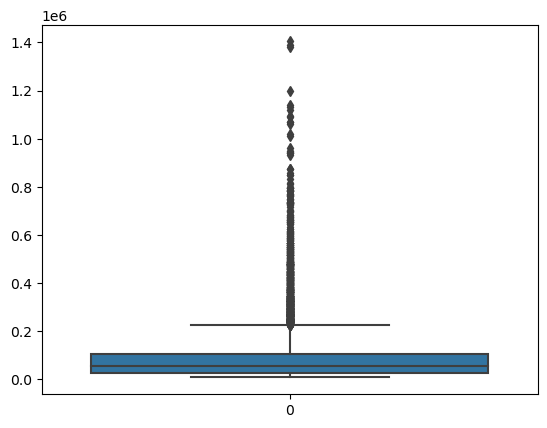

In [10]:
##Ïù¥ÏÉÅÏπò Ï†úÍ±∞ÌïòÍ∏∞ 
import seaborn as sns
sns.boxplot(rfm.monetary)

# Monetary Ïù¥ÏÉÅÏπò Ï†úÍ±∞ÌïòÍ∏∞ 
1.3*1e6
rfm[rfm['monetary'] > 1000000].index
# Ïù¥ÏÉÅÏπò Ï†úÍ±∞Ìïú Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑ 
# drop = True ÌïòÏßÄ ÏïäÏúºÎ©¥ indexÏª¨ÎüºÏù¥ ÌïòÎÇò Îçî ÏÉùÍπÄ
rfm = rfm.drop(rfm[rfm['monetary'] > 1000000].index, axis = 0).reset_index(drop=True)

In [192]:
# binsÎÇòÎàÑÎäî Î∞©Î≤ï
# rfm['frequency'].describe()
# rfm['recency'].describe(percentiles=[.25,.5,.75,.9])

In [11]:
# assigning the numbers to RFM values. The better the RFM value higher the number
# note that this process is reverse for R score as lower the value the better it is
# ÌÜµÍ≥ÑÎüâ ÌååÏïÖÌï¥ÏÑú ÏïåÎßûÏùÄ Íµ¨Í∞Ñ ÏÑ§Ï†ïÌï¥Ï£ºÍ∏∞ 
rfm['recency_score'] = pd.cut(rfm['recency'], bins=[0,6,51,153,218,245], labels=[5,4,3,2,1])
rfm['recency_score'] = rfm['recency_score'].astype('int')
rfm['frequency_score'] = pd.cut(rfm['frequency'], bins=[0,1,2,4,8,40], labels=[1,2,3,4,5])
rfm['frequency_score'] = rfm['frequency_score'].astype('int')
rfm['monetary_score'] = pd.cut(rfm['monetary'], bins=[0,26000,52000,104000,222000,970000], labels=[1,2,3,4,5])
rfm['monetary_score'] = rfm['monetary_score'].astype('int')

In [12]:
# summing the R,F,M score to make a one single column that has value range from 3-15
def score_rfm(x) : return (x['recency_score']) + (x['frequency_score']) + (x['monetary_score'])
rfm['score'] = rfm.apply(score_rfm,axis=1 )
rfm

membership_no  recency  frequency  monetary  recency_score  \
0               137      141          1    100000              3   
1               153        1         11    164000              5   
2               180        1          2     61000              5   
3               208        1         22    281000              5   
4               291        1         29    609000              5   
...             ...      ...        ...       ...            ...   
7408         151972        1          1     40000              5   
7409         151978        1          1     14000              5   
7410         151980        1          1     14000              5   
7411         151981        1          1     30000              5   
7412         151984        1          1     14000              5   

      frequency_score  monetary_score  score  
0                   1               3      7  
1                   5               4     14  
2                   2               3     10  
3                   5               5     15  
4                   5               5     15  
...               ...             ...    ...  
7408                1               2      8  
7409                1               1      7  
7410                1               1      7  
7411                1               2      8  
7412                1               1      7  

[7413 rows x 8 columns]

In [13]:
# assigning the customers into one of the category Bad, Bronze, Silver, Gold and Platinum based upon the score they get
# we make cuts using percentiles. It can be done in many other ways

rfm['customer_type'] = pd.cut(rfm['score'], bins=[0,6,8,11,13,15], labels=['Bad','Bronze','Silver','Gold','Platinum'])
rfm

membership_no  recency  frequency  monetary  recency_score  \
0               137      141          1    100000              3   
1               153        1         11    164000              5   
2               180        1          2     61000              5   
3               208        1         22    281000              5   
4               291        1         29    609000              5   
...             ...      ...        ...       ...            ...   
7408         151972        1          1     40000              5   
7409         151978        1          1     14000              5   
7410         151980        1          1     14000              5   
7411         151981        1          1     30000              5   
7412         151984        1          1     14000              5   

      frequency_score  monetary_score  score customer_type  
0                   1               3      7        Bronze  
1                   5               4     14      Platinum  
2                   2               3     10        Silver  
3                   5               5     15      Platinum  
4                   5               5     15      Platinum  
...               ...             ...    ...           ...  
7408                1               2      8        Bronze  
7409                1               1      7        Bronze  
7410                1               1      7        Bronze  
7411                1               2      8        Bronze  
7412                1               1      7        Bronze  

[7413 rows x 9 columns]

In [14]:
# Í≥†Í∞ù ÏÑ∏Î∂ÑÌôî ÏßÑÌñâÏùÑ ÏúÑÌï¥ ÌååÏùº Ï†ÄÏû•ÌïòÍ∏∞, Í≥†Í∞ù Î∂ÑÏÑù
# rfm.to_csv('./rfm.csv', index = False)

In [197]:
# ÌÉúÎ∏îÎ°ú Î∂ÑÏÑùÌïòÍ∏∞ ÏúÑÌï¥ÏÑú Ï†ÄÏû•Ìï¥Îë†
# rfm.to_csv('rfm_analysis.csv', index = False)

In [21]:
round(rfm.customer_type.value_counts(normalize=True)*100,0)

Bad         35.0
Bronze      24.0
Silver      21.0
Gold        10.0
Platinum    10.0
Name: customer_type, dtype: float64

In [22]:
# looking the RFM value for each of the category
rfm.groupby('customer_type')['recency','frequency','monetary'].mean().round(0)

C:\Users\zxoro\AppData\Local\Temp\ipykernel_11556\3445396440.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  rfm.groupby('customer_type')['recency','frequency','monetary'].mean().round(0)


recency  frequency  monetary
customer_type                              
Bad              154.0        1.0   28267.0
Bronze            64.0        2.0   50201.0
Silver            35.0        3.0   91686.0
Gold              16.0        6.0  175125.0
Platinum           4.0       14.0  359322.0

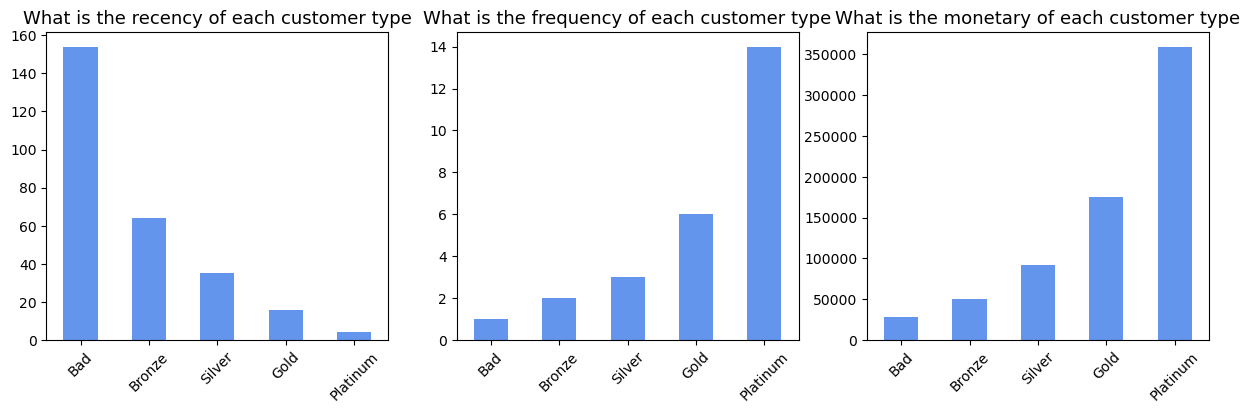

In [26]:
import matplotlib.pyplot as plt
column = ['recency','frequency','monetary']
plt.figure(figsize=(15,4))
for i,j in enumerate(column):
    plt.subplot(1,3,i+1)
    rfm.groupby('customer_type')[j].mean().round(0).plot(kind='bar', color='cornflowerblue')
    plt.title('What is the {} of each customer type'.format(j), size=13)
    plt.xlabel('')
    plt.xticks(rotation=45)

plt.show()

In [29]:
# copying the data into new variable
df_kmeans = rfm.copy()
# taking only relevant columns
df_kmeans = df_kmeans.iloc[:,:4]
df_kmeans.head()

membership_no  recency  frequency  monetary
0            137      141          1    100000
1            153        1         11    164000
2            180        1          2     61000
3            208        1         22    281000
4            291        1         29    609000

In [30]:
df_kmeans_c = df_kmeans.copy()

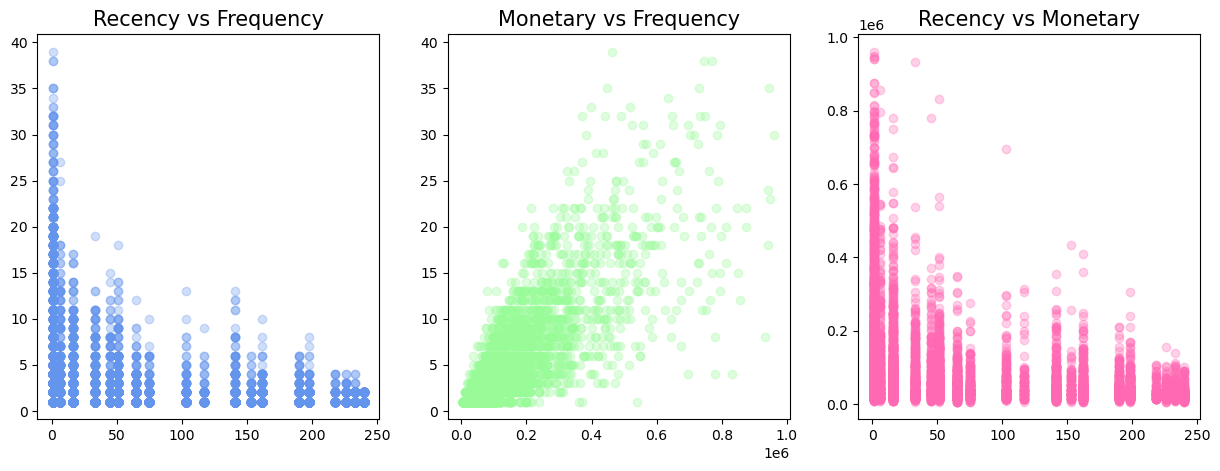

In [34]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.scatter(df_kmeans.recency, df_kmeans.frequency, color='cornflowerblue', alpha=0.3)
plt.title('Recency vs Frequency', size=15)
plt.subplot(1,3,2)
plt.scatter(df_kmeans.monetary, df_kmeans.frequency, color='palegreen', alpha=0.3)
plt.title('Monetary vs Frequency', size=15)
plt.subplot(1,3,3)
plt.scatter(df_kmeans.recency, df_kmeans.monetary, color='hotpink', alpha=0.3)
plt.title('Recency vs Monetary', size=15)
plt.show()

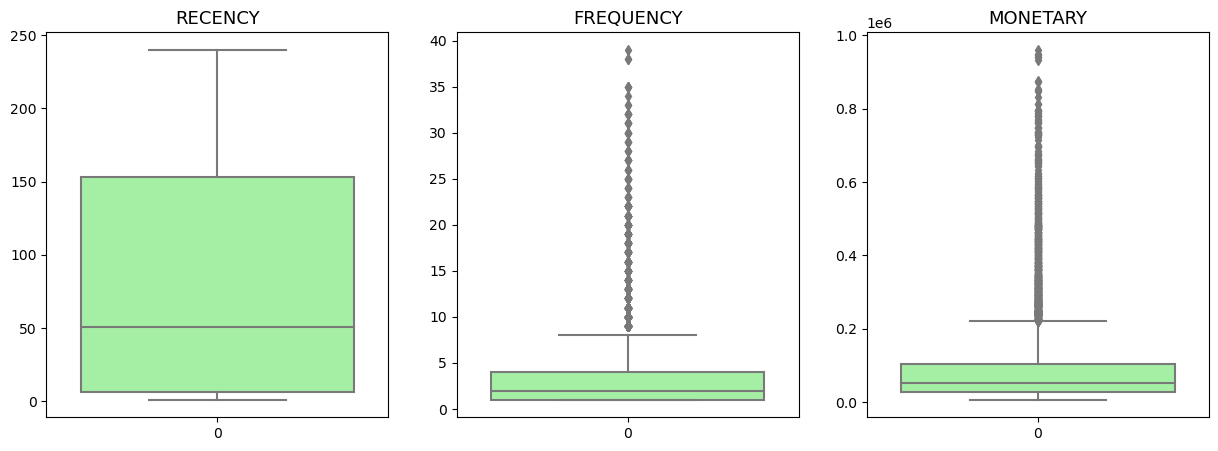

In [36]:
# checking the distribution of the variables
column = ['recency','frequency','monetary']
plt.figure(figsize=(15,5))
for i,j in enumerate(column):
    plt.subplot(1,3,i+1)
    sns.boxplot(df_kmeans[j], color='palegreen')
    plt.xlabel('')
    plt.title('{}'.format(j.upper()), size=13)
plt.show()

In [206]:
# Removing outliers for Monetary
Q1 = df_kmeans.monetary.quantile(0.05)
Q3 = df_kmeans.monetary.quantile(0.95)
IQR = Q3 - Q1
df_kmeans = df_kmeans[(df_kmeans.monetary >= Q1 - 1.5*IQR) & (df_kmeans.monetary <= Q3 + 1.5*IQR)]

# # Removing outliers for Recency
# Q1 = df_kmeans.recency.quantile(0.05)
# Q3 = df_kmeans.recency.quantile(0.95)
# IQR = Q3 - Q1
# df_kmeans = df_kmeans[(df_kmeans.recency >= Q1 - 1.5*IQR) & (df_kmeans.recency <= Q3 + 1.5*IQR)]

# Removing outliers for Frequency
Q1 = df_kmeans.frequency.quantile(0.05)
Q3 = df_kmeans.frequency.quantile(0.95)
IQR = Q3 - Q1
df_kmeans = df_kmeans[(df_kmeans.frequency >= Q1 - 1.5*IQR) & (df_kmeans.frequency <= Q3 + 1.5*IQR)]

In [207]:
# resetting the index
df_kmeans = df_kmeans.reset_index(drop=True)
df_kmeans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7372 entries, 0 to 7371
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   membership_no  7372 non-null   int64
 1   recency        7372 non-null   int64
 2   frequency      7372 non-null   int64
 3   monetary       7372 non-null   int64
dtypes: int64(4)
memory usage: 230.5 KB


In [208]:
# removing customer id as it will not used in making cluster
df_kmeans = df_kmeans.iloc[:,1:]

# scaling the variables and store it in different df
standard_scaler = StandardScaler()
df_kmeans_norm = standard_scaler.fit_transform(df_kmeans)

# converting it into dataframe
df_kmeans_norm = pd.DataFrame(df_kmeans_norm)
df_kmeans_norm.columns = ['recency','frequency','monetary']
df_kmeans_norm.head()

recency  frequency  monetary
0  0.763344  -0.572909  0.091209
1 -0.968178   2.018662  0.687389
2 -0.968178  -0.313752 -0.272089
3 -0.968178   4.869389  1.777282
4 -0.572401   0.463720 -0.216197

In [209]:
# To perform KMeans clustering 
from sklearn.cluster import KMeans
# Kmeans with K=5

model_clus5 = KMeans(n_clusters = 5)
model_clus5.fit(df_kmeans_norm)

KMeans(n_clusters=5)

In [210]:
# checking the labels
model_clus5.labels_

array([3, 0, 1, ..., 1, 1, 1])

In [211]:
df_kmeans['clusters'] = model_clus5.labels_
df_kmeans

recency  frequency  monetary  clusters
0         141          1    100000         3
1           1         11    164000         0
2           1          2     61000         1
3           1         22    281000         2
4          33          5     67000         4
...       ...        ...       ...       ...
7367        1          1     40000         1
7368        1          1     14000         1
7369        1          1     14000         1
7370        1          1     30000         1
7371        1          1     14000         1

[7372 rows x 4 columns]

In [212]:
df_kmeans.groupby('clusters').mean().round(0)

recency  frequency  monetary
clusters                              
0            12.0       10.0  278235.0
1            36.0        2.0   46565.0
2             3.0       18.0  497995.0
3           190.0        2.0   41421.0
4            24.0        5.0  145751.0

```
Finding the Optimal Number of Clusters
Elbow Curve to get the right number of Clusters
A fundamental step for any unsupervised algorithm is to determine the optimal number of clusters into which the data may be clustered. The Elbow Method is one of the most popular methods to determine this optimal value of k.
```

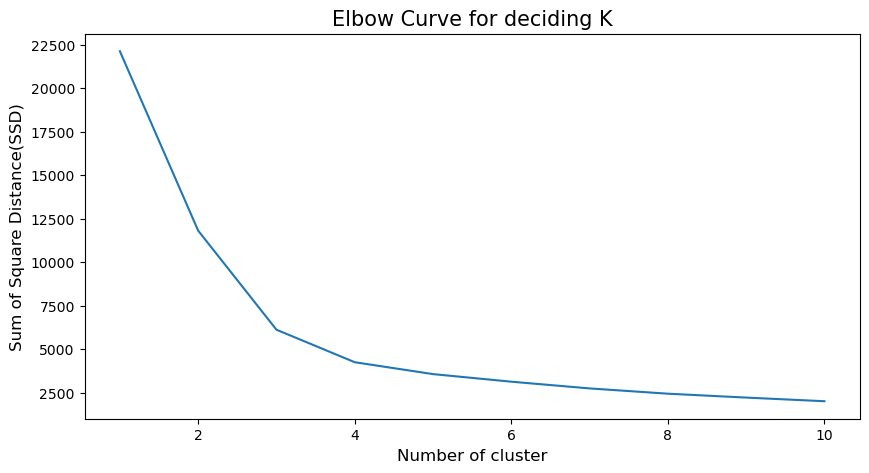

In [213]:
# Elbow-curve/SSD

ssd = []
for num_clusters in list(range(1,11)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(df_kmeans_norm)
    ssd.append(model_clus.inertia_)
    
# plot the SSDs for each n_clusters
plt.figure(figsize=(10,5))
plt.plot(np.arange(1,11,1), ssd)
plt.xlabel('Number of cluster', size=12)
plt.ylabel('Sum of Square Distance(SSD)', size=12)
plt.title('Elbow Curve for deciding K', size=15)
plt.show()

In [214]:
# Silhouette analysis
from sklearn.metrics import silhouette_score

for num_clusters in list(range(2,11)):
    # intialise kmeans
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(df_kmeans_norm)
    
    cluster_labels = model_clus.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df_kmeans_norm, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.5841101263196232
For n_clusters=3, the silhouette score is 0.5495504983423403
For n_clusters=4, the silhouette score is 0.5468960399700511
For n_clusters=5, the silhouette score is 0.5005120671881578
For n_clusters=6, the silhouette score is 0.44474091735563165
For n_clusters=7, the silhouette score is 0.4439801804360364
For n_clusters=8, the silhouette score is 0.42240976048061213
For n_clusters=9, the silhouette score is 0.37590571452119004
For n_clusters=10, the silhouette score is 0.3808951466463931


In [215]:
# Kmeans with K=3
model_clus3 = KMeans(n_clusters = 3)
model_clus3.fit(df_kmeans_norm)

KMeans(n_clusters=3)

In [216]:
df_kmeans['clusters'] = model_clus3.labels_
df_kmeans.head()

recency  frequency  monetary  clusters
0      141          1    100000         1
1        1         11    164000         2
2        1          2     61000         0
3        1         22    281000         2
4       33          5     67000         0

In [217]:
df_kmeans.groupby('clusters').mean().round(0)

recency  frequency  monetary
clusters                              
0            33.0        2.0   69295.0
1           190.0        2.0   42791.0
2            10.0       12.0  330637.0

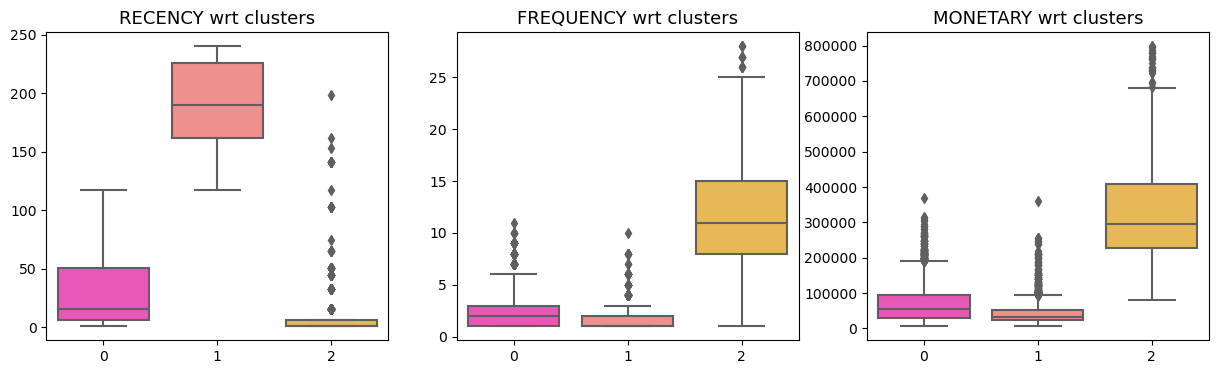

In [218]:
column = ['recency','frequency','monetary']
plt.figure(figsize=(15,4))
for i,j in enumerate(column):
    plt.subplot(1,3,i+1)
    sns.boxplot(y=df_kmeans[j], x=df_kmeans['clusters'], palette='spring')
    plt.title('{} wrt clusters'.format(j.upper()), size=13)
    plt.ylabel('')
    plt.xlabel('')

plt.show()

In [219]:
df_kmeans['clusters'].value_counts(normalize=False)

0    4240
1    2308
2     824
Name: clusters, dtype: int64

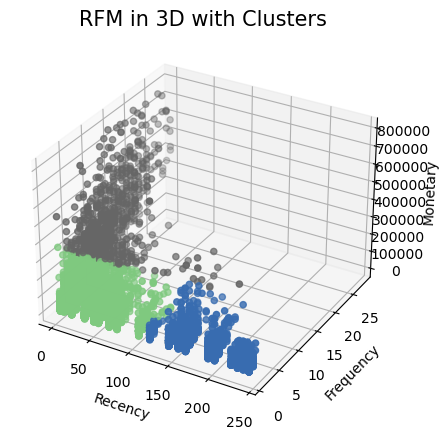

In [220]:
# Creating figure
fig = plt.figure(figsize = (8, 5))
ax = plt.axes(projection ="3d")

# Creating plot
ax.scatter3D(df_kmeans.recency, df_kmeans.frequency, df_kmeans.monetary, c=df_kmeans.clusters, cmap='Accent')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.title('RFM in 3D with Clusters', size=15)
ax.set(facecolor='white')
plt.show()

üìç Îì±Í∏âÎ≥Ñ ÌôïÏù∏

In [221]:
rfm = rfm[['membership_no', 'monetary', 'recency_score', 'frequency_score', 'monetary_score', 'customer_type']]
total_amount_of_sales = rfm['monetary'].sum() ## Íµ¨Îß§Í∏àÏï° Ï¥ùÌï© = Ï¥ù Îß§Ï∂ú

temp_rfm_score1 = rfm.groupby('customer_type')['membership_no'].count().reset_index().rename(columns={'membership_no':'Count'})
 
## ÌÅ¥ÎûòÏä§Î≥Ñ Íµ¨Îß§Í∏àÏï°(Îß§Ï∂ú)Í≥ÑÏÇ∞
temp_rfm_score2 = rfm.groupby('customer_type')['monetary'].sum().reset_index()
 
## ÌÅ¥ÎûòÏä§Î≥Ñ Îß§Ï∂ú Í∏∞Ïó¨ÎèÑ Í≥ÑÏÇ∞
temp_rfm_score2['monetary'] = temp_rfm_score2['monetary'].map(lambda x : x/total_amount_of_sales)
 
## Îç∞Ïù¥ÌÑ∞ Í≤∞Ìï©
result_df = pd.merge(temp_rfm_score1,temp_rfm_score2,how='left',on=('customer_type'))
result_df 

customer_type  Count  monetary
0           Bad   2596  0.105756
1        Bronze   1788  0.129363
2        Silver   1584  0.209306
3          Gold    726  0.183236
4      Platinum    719  0.372339

[Ï∞∏Í≥† ÏÇ¨Ïù¥Ìä∏](https://www.kaggle.com/code/mittalvasu95/cohort-rfm-k-means#III.-k-Means-Clustering)